In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [2]:
train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8410,aj,h,as,f,d,aa,j,e,0,...,0,0,0,0,0,0,0,0,0,0
4205,8411,t,aa,ai,d,d,aa,j,y,0,...,0,1,0,0,0,0,0,0,0,0
4206,8413,y,v,as,f,d,aa,d,w,0,...,0,0,0,0,0,0,0,0,0,0
4207,8414,ak,v,as,a,d,aa,c,q,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
y=train.y
train=train.drop(["y","ID"],axis=1)

In [7]:
from sklearn.feature_selection import VarianceThreshold
varr=VarianceThreshold(threshold=0.0)

In [9]:
num=train.select_dtypes(include=np.number)
obj=train.select_dtypes(exclude=np.number)

In [10]:
varr.fit(num)
    

VarianceThreshold()

In [11]:
varr.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [12]:
constant= [column for column in num.columns if column not in num.columns[varr.get_support()]]
num=num.drop(constant, axis=1)

In [13]:
constant

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [14]:
test.shape

(4209, 377)

In [15]:
num.shape

(4209, 356)

In [16]:
test=test.drop(constant,axis=1)

In [17]:
test.shape

(4209, 365)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
df_var=pd.DataFrame()
X_variable=num.columns
X_variable
X_Avariable=num[X_variable]

In [20]:
df_var["feature"]=X_Avariable.columns
df_var["vif"]=[variance_inflation_factor(X_Avariable.values,i)
              for i in range(len(X_variable))]

C:\Users\pavan\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


C:\Users\pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\pavan\anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


<AxesSubplot:xlabel='vif'>

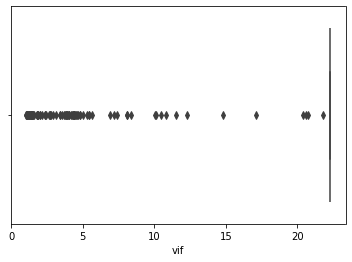

In [21]:
import seaborn as sns
sns.boxplot(df_var.vif)

In [22]:
vif_col=df_var[df_var.vif>20]

In [89]:
vif_col.value_counts()

feature  vif      
X10      inf          1
X329     69.269830    1
X310     inf          1
X311     inf          1
X312     20.781888    1
                     ..
X209     inf          1
X21      inf          1
X213     inf          1
X214     inf          1
X99      inf          1
Length: 271, dtype: int64

In [90]:
num1=num.drop(vif_col.feature,axis=1)

In [91]:
num1

,ID,X27,X38,X42,X46,X47,X50,X51,X55,X56,...,X350,X351,X353,X354,X357,X359,X361,X366,X383,X384
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,6,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,7,1,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
3,9,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,13,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4205,8406,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4206,8412,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4207,8415,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [92]:
obj=train.select_dtypes(include="object")

In [93]:
obj.shape

(4209, 8)

In [94]:
##FAMD

In [95]:
f_df=pd.concat([num1,obj],axis=1)

In [96]:
f_df.shape

(4209, 94)

In [97]:
from prince import FAMD
famd=FAMD(n_components=50)

In [98]:
model=famd.fit(f_df)

In [99]:
model.explained_inertia_

array([0.02371996, 0.02037193, 0.01849937, 0.01719865, 0.0149373 ,
       0.01384085, 0.01251418, 0.01232574, 0.01133846, 0.01066906,
       0.00991297, 0.00956498, 0.00923914, 0.00888964, 0.00871735,
       0.00846078, 0.00799766, 0.00789403, 0.00779166, 0.0075475 ,
       0.00733239, 0.00721758, 0.00710084, 0.00702433, 0.00686075,
       0.0067836 , 0.00655106, 0.00636344, 0.00627109, 0.0061264 ,
       0.00599879, 0.00583158, 0.0058083 , 0.00575695, 0.00571403,
       0.00554038, 0.0054215 , 0.00538974, 0.00536212, 0.00527033,
       0.00510571, 0.00502251, 0.00495674, 0.00489883, 0.00486477,
       0.00474543, 0.00467198, 0.00464556, 0.004566  , 0.00454176])

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (2.37% inertia)', ylabel='Component 1 (2.04% inertia)'>

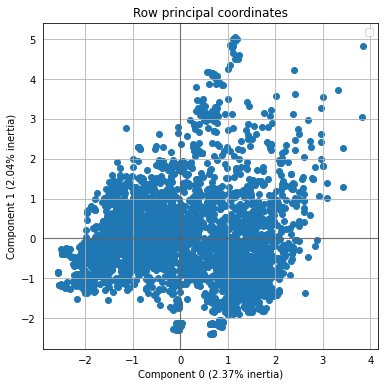

In [100]:
model.plot_row_coordinates(f_df)

In [101]:
model.explained_inertia_

array([0.02371996, 0.02037193, 0.01849937, 0.01719865, 0.0149373 ,
       0.01384085, 0.01251418, 0.01232574, 0.01133846, 0.01066906,
       0.00991297, 0.00956498, 0.00923914, 0.00888964, 0.00871735,
       0.00846078, 0.00799766, 0.00789403, 0.00779166, 0.0075475 ,
       0.00733239, 0.00721758, 0.00710084, 0.00702433, 0.00686075,
       0.0067836 , 0.00655106, 0.00636344, 0.00627109, 0.0061264 ,
       0.00599879, 0.00583158, 0.0058083 , 0.00575695, 0.00571403,
       0.00554038, 0.0054215 , 0.00538974, 0.00536212, 0.00527033,
       0.00510571, 0.00502251, 0.00495674, 0.00489883, 0.00486477,
       0.00474543, 0.00467198, 0.00464556, 0.004566  , 0.00454176])

In [102]:
model.total_inertia_

0.013817733652040021

In [103]:
f_dfd=model.transform(f_df)

In [104]:
test=famd.fit_transform(test)

ValueError: FAMD works with categorical and numerical data but you only have numerical data; you should consider using PCA

In [105]:
f_dfd

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-1.143517,2.768315,0.769424,0.516172,0.565950,-0.638945,0.686068,-1.190375,-0.474110,1.181982,...,-0.883994,-1.144426,-0.566222,-1.854200,-0.405275,-0.270920,-2.534785,-0.376728,-1.258378,0.202235
1,-1.026615,0.034598,-0.122635,0.637103,-0.016914,-0.089305,-0.495169,-0.738287,-0.388247,0.556613,...,1.362890,2.570377,-1.132154,-0.837184,-0.659216,-1.834344,2.989908,1.727964,0.721677,1.082410
2,1.453330,3.331279,-2.549644,3.456095,-4.777612,-2.985423,-0.651169,-1.030268,-2.996137,-4.007168,...,-0.186802,-0.801619,-0.481131,-0.899050,0.022704,0.973231,-1.054088,-0.479711,0.571570,-0.398035
3,-0.008624,1.885899,-2.473614,3.588389,-3.482675,-4.024935,-0.108783,-2.588802,-4.036965,-5.025103,...,1.432959,-0.891724,-1.055785,-0.068121,0.744023,-1.072672,-0.590148,-0.130399,-0.341594,0.031343
4,0.060956,1.276459,-2.490024,2.824572,-3.290795,-3.674278,-0.109446,-2.678832,-3.493803,-5.294679,...,-1.524755,2.837488,1.065540,-0.791850,0.606297,-2.219747,2.440696,1.125996,1.598960,1.766739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,1.612172,0.597581,0.278052,-0.110381,-0.142335,0.821840,0.436063,0.533699,-0.555643,0.038509,...,-0.203601,0.683732,0.136135,-0.123011,0.355789,-0.278786,0.640190,0.185320,-0.305231,-0.341764
4205,-1.092763,0.353605,0.929554,0.569088,0.782678,0.485258,0.128159,0.256240,1.133383,-0.883541,...,0.293165,0.850636,0.403294,0.612911,0.199690,-0.092046,-0.152767,0.627011,-0.371175,0.763910
4206,0.563972,1.095339,0.044062,0.896167,0.927019,-0.621288,1.103052,-0.472264,-2.526276,1.175452,...,0.273249,0.749094,0.082907,0.166023,0.138361,0.288499,-0.291600,-0.019716,-0.494855,-0.137525
4207,-1.071718,-0.886748,-0.398162,1.335942,0.152715,0.607119,-0.297304,0.533097,0.119550,-0.472475,...,-0.081609,0.880578,0.460241,-0.219411,0.193762,-1.122382,-0.140778,0.361308,-0.289416,-0.621515


In [106]:
test

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.903892,4.877867,4.711189,1.136742,0.488535,-0.115980,-0.095855,0.706506,-1.734852,-0.845628,...,9.978927,0.178617,-0.101788,-1.747367,4.003144,6.310106,2.454559,5.160091,-0.449739,-1.643146
1,-0.266312,-2.187545,1.860342,1.090135,-1.431583,0.158334,0.475622,0.780193,-0.973599,-0.685103,...,11.707602,2.952048,-2.073667,2.031720,7.701545,2.200976,3.533672,1.130801,-2.277697,-0.149638
2,1.228755,3.849428,3.033613,1.568278,0.670343,-0.515971,-0.532744,0.796954,-0.530203,-0.335438,...,10.336566,4.375559,1.128305,1.468161,2.883947,1.068377,2.207764,6.107675,1.784108,0.952519
3,1.858988,4.826947,4.523805,0.753346,0.502198,-1.037625,-0.012834,0.433833,-1.838097,-1.371464,...,-2.109487,3.217399,4.478259,-2.031431,-2.489199,5.074860,-0.023375,-0.166165,-0.507039,-4.337837
4,-0.343256,0.799539,-2.025537,1.107669,-0.497516,-0.081596,-1.281601,-0.195550,0.130626,-0.446313,...,-0.146697,-0.866038,3.637609,2.903943,-1.651729,-0.102137,-1.177229,1.163353,-2.003515,-0.976819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,-0.164523,1.138957,-1.384731,-0.582955,0.240796,-0.438008,-0.029445,-0.391911,-0.091226,-0.031197,...,-0.915209,0.526306,-0.865105,0.832366,0.765814,-0.186305,0.128018,1.442981,0.218227,-0.546064
4205,-0.210534,-1.091043,0.788273,0.034369,0.030790,0.866550,-0.909678,0.346643,0.526231,-0.164506,...,0.597709,0.131104,-0.125556,-0.259168,0.312144,-0.290774,0.014056,0.236390,-0.103098,0.153348
4206,-0.388612,0.616212,-0.323882,-1.162474,0.438837,0.007100,-0.024242,0.131444,0.041458,0.249943,...,0.138107,-0.359658,-0.050820,-0.074294,0.152780,-0.383602,0.242453,0.952405,-0.334854,-0.176870
4207,-0.233372,0.493795,-1.206434,0.989545,0.202402,0.185418,0.012672,-0.159696,-0.303995,-0.155394,...,0.122525,-0.031567,-0.222219,-0.042410,0.361085,-0.008666,0.345774,0.732491,-0.986211,-1.112154


In [107]:
from sklearn.model_selection import train_test_split

In [108]:
xtrain,xtest,ytrain,ytest=train_test_split(f_dfd,y,test_size=0.33)

In [109]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((2820, 50), (1389, 50), (2820,), (1389,))

In [110]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [111]:
model_lr=lr.fit(xtrain,ytrain)

In [112]:
model_lr.score(xtrain,ytrain)

0.3975403271755322

In [113]:
ypred=model_lr.predict(xtest)

In [114]:
model_lr.score(xtest,ytest)

0.3439958113039643

In [117]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)
model_ridge=ridge.fit(xtrain,ytrain)
model_ridge.score(xtrain,ytrain)

0.3975401794336164

In [118]:
model_ridge.score(xtest,ytest)

0.3440544804265727